# Tutorial 10 - Neural Networks

*Written and revised by Jozsef Arato, Mengfan Zhang, Dominik Pegler*  
Computational Cognition Course, University of Vienna  
https://github.com/univiemops/tewa1-computational-cognition

---
## This week's lab:

This week's tutorial delves into neural networks, building on our basic understanding of **supervised learning** from linear regression. In previous tutorials, we learned how linear regression models use a simple linear approach to establish relationships between features and labels, allowing us to predict outcomes based on input data. Neural networks take this concept further by introducing multiple layers of interconnected nodes (neurons) that allow the model to capture **complex, nonlinear relationships** in the data. This tutorial will demonstrate how to implement and train a simple neural network using our familiar Python libraries, highlighting the advances over linear regression in handling more complicated patterns.

Artificial neural networks also serve as cognitive models by mimicking the interconnected neuron structure of the brain to process and learn from complex data, simulating human-like perception and decision making.

**Learning goals:** \
When finishing this tutorial, you should be able to ...
1. Understand the basic building blocks of artificial neural networks
2. Understand the forward pass and backpropagation
3. Incorporate higher-level libraries into your data analysis pipelines

<div class='alert alert-danger'>Please complete all parts of this tutorial.</div>

---

## 1. Implementing a Neural Network in NumPy

You can think of artificial neural networks as complex functions with multiple parameters. You input data into the network on the left side and it outputs a result on the right side. Within the network, this input data passes through layers of mini-functions housed in units called neurons. These mini-functions are called activation functions. As the input data is processed by each neuron's activation function, it moves to the next layer until it produces a final output. This process is known as the **forward pass**.

To learn, the network compares this output with the correct result and calculates the error. This error is used to compute **gradients**. These gradients (a vector of numbers) adjust the network's parameters, known as weights and biases, to reduce errors in future outputs. This adjustment process, which moves from the output layer back to the input layer, is called **backpropagation**.

Understanding the calculation of these gradients and their use in parameter updates requires some knowledge of calculus. The method used to perform these updates is known as gradient descent (GD), which iteratively minimizes the error, as opposed to methods such as **ordinary least squares**, which aim to find an optimal value in one step. Due to the complexity of neural networks, finding the optimal parameters directly by ordinary least squares is typically not feasible, that's why the need for the iterative approach of GD, where the learning rate controls the size of each step toward the optimal parameters.

To better understand the logic, it is often helpful to try to understand the **simplest case**. Below you see a 1-neuron network that learns the logical OR function (if at least one input is 1 it should return 1). The neuron is labeled $y$ and takes in two inputs: $x_0$ and $x_1$. The neuron has three parameters, the weights $w_0$ and $w_1$ and the bias $b$. When the neuron receives input, the signals from $x_0$ and $w_1$ are processed as follows:

(1) $\large
z = w_0 x_0 + w_1 x_1 + b
$

This value is then passed into the activation function $g(z)$, which in this case is a sigmoid function as in logistic regression:

(2) $\large
    \hat{y} = g(z) = \frac{1}{1 + e^{-z}}
$

To measure our performance we need a loss function $L$. It is defined as the squared error:

(3) $\large
L = ( \hat{y} - y )^2
$

Here is the equation for computing the gradients of the loss function (here with respect to the weights $w$). Yes, it looks weird and is displayed as three characters:

(4) $\large
\nabla_w L = 2  ( \hat{y} - y )  g(z)  (1 - g(z))  x_i
$

And this is the final update of our parameters using the learning rate $\alpha$ (`alpha`):

(5) $\large
w \leftarrow w - \alpha \nabla_w L$

(6) $\large
b  \leftarrow b - \alpha \nabla_b L$

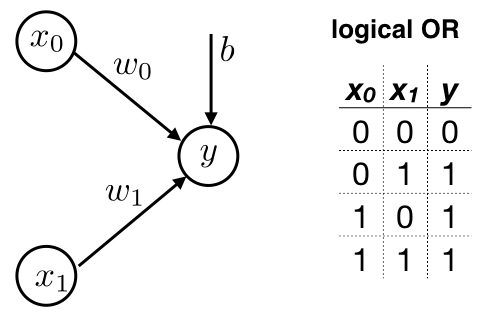

*Fig. 1: A "network" with only one neuron $y$ learns the OR function.*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Your tasks are now:

1) Create the data according to Figure 1: Store the $x_0$ and $x_1$ values in an array called `X` (shape should be (4,2)) and the $y$ values in a 1D-Array called `Y`  
2) To be able to efficiently compute gradients, we will treat all our parameters as vectors, i.e. 1D-NumPy-Arrays. Create an array `w` with two random numbers and an array `b` with one random number (we don't know the values yet, the network will need to learn them). You can use `np.random.randn()`.  
3) Implement the activation function `g` that takes $z$ as an input (see equation 2)  
4) Implement the loss/error function called `loss`. It should take in two values and compute their squared difference. See equation 3.  
5) Implement the gradient function called `grad_func` as seen in equation 4.  
6) Update the parameters inside the `train_network()` function using the gradients that were computed with `grad_func`. See equations 5 & 6.  

In [ ]:
# 1. create input matrix X and target vector Y

# YOUR CODE HERE
# --------------


# --------------

In [ ]:
# 2. create arrays w and b with random values

# YOUR CODE HERE
# --------------


# --------------

In [ ]:
# 3. define activation function


# YOUR CODE HERE
# --------------


# --------------

In [ ]:
# 4. implement loss/error function


# YOUR CODE HERE
# --------------


# --------------

In [ ]:
# 5. compute the gradients (the crucial part)


def grad_func(y, y_hat, z, g, x_i):
    # YOUR CODE HERE
    # --------------

    
    
    # --------------

In [ ]:
# TEST CELL


assert round(g(5), 3) == 0.993  # test 1 function g()
assert (
    w.dtype == "float" and w.shape == (2,) and b.dtype == "float" and b.shape == (1,)
)  # test 2 initial parameters
assert (
    X.shape == (4, 2) and Y.shape == (4,) and np.array_equal(Y @ X, [2, 2])
)  # test 3 X and Y
assert loss(5, 10) == 25  # test 4 loss function
assert round(grad_func(5, 10, 3, g, 1), 3) == 0.452  # test 5 gradient function

print("Well done. You're all set to continue with your implementation.")

There is one last thing to do, the parameter update, step 6. After you are done, we can run the code below and test our implementation. We will run a training of 5,000 epochs with a learning rate of 0.05.

In [ ]:
alpha = 0.05  # step size aka learning rate
n_epochs = 5_000  # number of trainings runs


def train_network(X, Y, weights, bias, loss, grad_func, n_epochs, alpha):
    """Train the neuron and return errors and parameters."""

    weights = weights.copy()
    bias = bias.copy()

    def print_params(weights, bias):
        print(
            f"""Epoch {epoch: 5}: Err ={error_epoch: .3f}, w_0 ={weights[0]: .3f},"""
            f""" w_1 ={weights[1]: .3f}, b ={bias[0]: .3f}"""
        )

    def print_final(x, y_hat, y):
        print(f"X={x.astype(int)} and Y={y.item():.0g} => {y_hat.item():.3f}")

    track_error = []
    first_result = True

    for epoch in range(n_epochs):
        error_epoch = 0.0  # sum error across the epoch
        perm = np.random.permutation(X.shape[0])

        for p in perm:  # visit data points in random order
            x = X[p, :]  # input pattern

            # FORWARD PASS

            # compute output
            z = np.dot(x, weights) + bias
            y_hat = g(z)

            # compute loss
            y = Y[p]
            error = loss(y_hat, y)
            error_epoch += error.item()

            # print output if this is the last epoch
            if epoch == n_epochs - 1:
                if first_result:
                    print("\nFinal predictions:")
                print_final(x, y_hat, y)
                first_result = False

            # BACKPROPAGATION

            w_grad = grad_func(y, y_hat, z, g, x)
            b_grad = grad_func(y, y_hat, z, g, 1)

            # 6. update parameters with gradient descent

            # YOUR CODE HERE
            # --------------
            # weights =
            # bias =


        
            # --------------

        track_error.append(error_epoch)

        if epoch % 500 == 0:  # only print every 500 epochs
            print_params(weights, bias)

    return track_error, weights, bias


errors, _, _ = train_network(X, Y, w, b, loss, grad_func, n_epochs, alpha)

fig, ax = plt.subplots()
ax.plot(errors)
ax.set_title("Learning Curve")
ax.set_ylabel("error")
ax.set_xlabel("epoch")
print()
plt.show()

If done correctly, the example shows that the error rate exponentially decreases with the number of epochs. See the output and how the parameters ($w_0$, $w_1$ and $b$) change during training while the error gets smaller.

## 2. How Gradient Descent Works

Finding the optimum in a two-dimensional parameter space (regression with intercept and slope).

In this chapter you don't have to code anything, just run the code and answer the question at the end.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

np.random.seed(0)

alpha = 0.001  # learning rate

x = np.random.randint(1, 20, 10)
y = x + np.random.randint(-5, 6, 10)

# fit model to data with least squares and predict
lr = LinearRegression().fit(x.reshape(-1, 1), y)
b0, b1 = lr.intercept_, lr.coef_[0]


def compute_mse_gradients(y_pred, y):
    # derivative of loss function with respect to intercept
    gradients_b0 = 2 * (y_pred - y)
    # derivative of loss function with respect to slope
    gradients_b1 = 2 * (y_pred - y) * x
    return gradients_b0, gradients_b1


def update_parameters(b0, b1, gradient_b0, gradient_b1, lr):
    updated_b0 = b0 - lr * gradient_b0
    updated_b1 = b1 - lr * gradient_b1
    return updated_b0, updated_b1


def compute_mse(y_pred, y):
    mse = np.mean((y_pred - y) ** 2)
    return mse


def plot_mse(x, y, y_pred, ax=None):
    mse = compute_mse(y_pred, y)
    if ax is None:
        ax = plt.subplot()
    ax.scatter(x, y, color="steelblue")
    ax.plot(x, y_pred, color="salmon")
    ax.set_title(f"b0: {b0:.2f}, b1: {b1:.2f}, MSE: {mse:.2f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    return ax


y_pred = b0 + b1 * x

print("Ordinary Least Squares – The Gold Standard Method")
plot_mse(x, y, y_pred);

Initial parameter values


In [ ]:
b0 = 0
b1 = 0

Run below cell multiple times to see the MSE decrease

In [ ]:
print("Iterative Method Using Gradient Descent")

y_pred = b0 + b1 * x

# plot setup
fig, axs = plt.subplots(1, 2, figsize=(12.5, 4.5))

# plot 1
axs[0] = plot_mse(x, y, y_pred, axs[0])
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

# plot 2
b0_vals = np.linspace(-20, 20, 100)
b1_vals = np.linspace(-1, 3, 100)
B0, B1 = np.meshgrid(b0_vals, b1_vals)
mse_values = np.zeros_like(B0)

for i, b0_ in enumerate(b0_vals):
    for j, b1_ in enumerate(b1_vals):
        y_pred = b0_ + b1_ * x
        mse_values[i, j] = compute_mse(y_pred, y)

surface = axs[1].contourf(B0, B1, mse_values.T, levels=20, cmap="viridis_r")
fig.colorbar(surface, ax=axs[1], label="MSE")
axs[1].set_xlabel("b0")
axs[1].set_ylabel("b1")
axs[1].set_title("Optimality of current parameters in parameter space")
y_pred = b0 + b1 * x
axs[1].scatter(
    b0, b1, color="red", label=f"Current Position (MSE: {compute_mse(y_pred, y):.2f})"
)
axs[1].legend()
print(
    "Note: The space on the right is usually not know, that's why we use methods like gradient descent."
)

# update
gradients_b0, gradients_b1 = compute_mse_gradients(y_pred, y)
b0, b1 = update_parameters(b0, b1, np.mean(gradients_b0), np.mean(gradients_b1), alpha)

**Q: What do you observe here?**

## 3. High-Level Use-Case with Pre-built Models

Neural networks are typically implemented using something like [PyTorch](https://pytorch.org/docs/stable/index.html), a library optimized for deep learning, much like we did with NumPy above. For users who want to quickly use off-the-shelf state-of-the-art models with minimal effort, e.g. for inclusion in a data analysis pipeline, the [**Hugging Face Transformers**](https://huggingface.co/docs/transformers/) library is ideal.

In this task we are dealing with a large neural network (ResNet50; https://doi.org/10.1109/CVPR.2016.90) that takes images as input and classifies them. We are not interested in the classification of images, but rather in their features. **Features** are the activations in the neurons in the last hidden layer when a specific image is passed through the neural network. We want to compare these activations between different images and see how similar/dissimilar they are.

Steps:

1. Extract the features for all 120 images using our `extractor` model below and store them. Simply pass the filename(s) and set `pool=True`. This will return a list for each image – it makes sense to convert these lists to arrays.
2. Compute the dissimilarities (distances) between all image pairs based on their feature extraction vectors (use the `scipy.spatial.distance.cosine` function) (Note: The features of an image will need to be 1D arrays, if they have more dimensions, you will need to flatten the array, e.g. with `.reshape(-1)`)

Analog to the unsupervised learning tutorial:

3. Create the distance matrix $D$ from the networks' dissimilarity ratings
4. Compute a 2D MDS embedding
5. Plot the results using the `plot_mds()` function from last tutorial and compate the networks' MDS with the human MDS

More Info about feature extraction: https://huggingface.co/docs/transformers/main/en/tasks/image_feature_extraction

In [ ]:
# !pip install transformers==4.28.0
# !pip install pytorch==2.0

In [ ]:
from transformers import pipeline

extractor = pipeline("image-feature-extraction", model="microsoft/resnet-50")

Download the data

In [ ]:
import os
import zipfile
from glob import glob

import requests


def download_file(filename, url):
    """Download file from url and store it under specified filename."""

    if not os.path.isfile(filename):
        with requests.get(url) as fo:
            open(filename, "wb").write(fo.content)
        print(f"{filename} downloaded.")
    else:
        print(f"{filename} already available.")


def unzip_file(zip_filepath, extract_to_folder):
    """Unzip a zip file to a specified folder."""

    if not os.path.exists(extract_to_folder):
        os.makedirs(extract_to_folder)

    with zipfile.ZipFile(zip_filepath, "r") as zip_ref:
        zip_ref.extractall(extract_to_folder)
        print(f"Files extracted to {extract_to_folder}")


FILEPATH = "data_peterson_2018.zip"

download_file(
    FILEPATH,
    "https://ucloud.univie.ac.at/index.php/s/Yi2BbmWqcZRnbfH/download",
)
unzip_file(FILEPATH, "./")
filenames = sorted(glob(os.path.join("data_peterson_2018", "fruits", "*.png")))

In [ ]:
from scipy.spatial.distance import cosine

# 1. extract features

features = extractor(filenames, pool=True)

In [ ]:
# 2.–3. compute distance for each pair and create distance matrix D

# YOUR CODE HERE
# --------------









# --------------

In [ ]:
# SANITY CHECK


def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)


if check_symmetric(D):
    print("Good job. Your matrix is symmetric!")
else:
    raise Exception("Something went wrong. Your matrix is NOT symmetric!")

In [ ]:
# check if all values are between 0 and 1
# if yes, then no further scaling, conversion needed

print(D.min())
print(D.max())

In [ ]:
from sklearn.manifold import MDS

# 4. create model using MDS
# for better convergence we recommend using the following parameters:
# max_iter=10_000,
# eps=1e-100,
# metric=True,
# normalized_stress=False,

# then fit_transform the model to the data (D) and store
# results in variable emb

# YOUR CODE HERE
# --------------









# --------------

In [ ]:
# SANITY CHECK

if emb.shape == (120, 2):
    print(
        "Your embedding looks correct, it contains 2-dimensional coordinates for our 120 stimuli."
    )
else:
    raise Exception(
        "Something went wrong. Your embedding does not have the correct shape!"
    )

In [ ]:
# 5. plot the results

import seaborn as sns
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from PIL import Image, ImageDraw


def plot_mds(data, images, zoom, max_size, dpi=100, radius=30):
    fig, ax = plt.subplots(figsize=(9, 9), facecolor="white")

    def rounded_square(im, radius=20):
        if len(im.shape) == 2:  # greyscale image
            im = np.stack((im, im, im), axis=-1)
        h, w, t = im.shape
        lum_img = Image.new("L", [h, w], 0)
        draw = ImageDraw.Draw(lum_img)
        draw.rounded_rectangle(((0, 0), (h, w)), radius, fill=255)
        lum_img_arr = np.array(lum_img)
        if t == 4:  # E.g. PNGs
            im = np.multiply(im, lum_img_arr.reshape(h, w, 1))
        else:
            im = np.dstack((im, lum_img_arr))
        im = im.astype(np.uint8)
        return im

    def imscatter(x, y, image, ax=None, zoom=1, max_size=100, radius=20):
        if ax is None:
            ax = plt.gca()
        try:
            image = plt.imread(image)
        except TypeError:
            pass
        resize_ratio = max(image.shape) / max_size

        # only downsize
        if resize_ratio > 1:
            image = image[:: int(resize_ratio), :: int(resize_ratio)]

        short_side = np.min(image.shape[:2])
        clip_size = np.abs(image.shape[0] - image.shape[1]) // 2
        if image.shape[0] >= image.shape[1]:
            image = image[clip_size : clip_size + short_side, :]
        else:
            image = image[:, clip_size : clip_size + short_side]

        image = rounded_square(image, radius)

        im = OffsetImage(image, zoom=zoom)
        x, y = np.atleast_1d(x, y)
        artists = []
        for x0, y0 in zip(x, y):
            ab = AnnotationBbox(im, (x0, y0), xycoords="data", frameon=False)
            artists.append(ax.add_artist(ab))
        ax.update_datalim(np.column_stack([x, y]))
        ax.autoscale()

        return None

    x = data[:, 0]
    y = data[:, 1]

    for i, img in enumerate(images):
        imscatter(
            x[i],
            y[i],
            img,
            ax=ax,
            zoom=zoom,
            max_size=max_size,
            radius=radius,
        )

    ax.tick_params(
        labeltop=False,
        labelright=False,
        labelbottom=False,
        labelleft=False,
        bottom=False,
        top=False,
        left=False,
        right=False,
    )


# 7. plot the resulting MDS embedding

plot_mds(
    emb,
    filenames,
    zoom=0.20,
    max_size=151,
    dpi=240,
    radius=40,
)

**Q1: What do you observe, how does this representation differ from the human representation from the last tutorial?**

**Q2: Here we defined the neural network model in only one line `extractor = pipeline("image-feature-extraction", model="microsoft/resnet-50")`. Compared to a detailled construction like with NumPy before what could this mean for science, e.g. reproducibility?**